In [6]:
import os # package to traverse the directories on your computer
import pandas as pd # dataframe reading, writing, and manipulation
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

In [8]:
data_path = "/Users/nyanlintun/Downloads"
os.chdir(data_path)

In [10]:
df = pd.read_excel("public_emdat_project.xlsx")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     15784 non-null  object        
 1   Historic                                   15784 non-null  object        
 2   Classification Key                         15784 non-null  object        
 3   Disaster Group                             15784 non-null  object        
 4   Disaster Subgroup                          15784 non-null  object        
 5   Disaster Type                              15784 non-null  object        
 6   Disaster Subtype                           15784 non-null  object        
 7   External IDs                               2405 non-null   object        
 8   Event Name                                 4955 non-null   object        
 9   ISO              

In [32]:
# View count of missing values
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      

In [18]:
# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
       AID Contribution ('000 US$)     Magnitude     Latitude    Longitude  \
count                 4.900000e+02  3.378000e+03  1815.000000  1815.000000   
mean                  2.851070e+04  6.006125e+04    16.464334    42.139949   
min                   3.000000e+00 -5.700000e+01   -72.640000  -172.095000   
25%                   1.660000e+02  7.600000e+00     1.102500     0.859500   
50%                   7.665000e+02  1.900000e+02    18.590000    54.448200   
75%                   4.951000e+03  2.049750e+04    34.816500   103.099000   
max                   3.518530e+06  4.000000e+07    67.930000   179.650000   
std                   2.116816e+05  7.412252e+05    21.776287    75.535413   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15784.000000  15715.000000  14275.000000  15784.000000  15622.000000   
mean    2010.590155      6.448616     15.361331   2010.621706      6.572782   
min     2000.00000

In [34]:
# Fill in missing values using fillna()
# Skip columns like latitude, longitude, etc. 
skip_cols = ["Latitude", "Longitude", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]

# Get a list of columns to fill excluding the skipped columns 
fill_cols = df.columns.difference(skip_cols)

# Fill NaN values that are found only in the fill_cols list
# Use .apply() to apply a function to each value in a column
# In this case we are filling the NaN values with the median as the median is the least vunerable to outliers
df[fill_cols] = df[fill_cols].apply(lambda x: x.fillna(x.median()) if x.dtype in ['float64', 'int64'] else x)

# View count of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0


Unique Disaster Types:
['Drought' 'Road' 'Flood' 'Extreme temperature' 'Fire (Miscellaneous)'
 'Volcanic activity' 'Storm' 'Wildfire' 'Earthquake' 'Rail' 'Air'
 'Collapse (Industrial)' 'Collapse (Miscellaneous)' 'Fire (Industrial)'
 'Explosion (Miscellaneous)' 'Epidemic' 'Water' 'Mass movement (wet)'
 'Explosion (Industrial)' 'Chemical spill' 'Gas leak' 'Infestation'
 'Miscellaneous accident (General)' 'Poisoning' 'Mass movement (dry)'
 'Industrial accident (General)' 'Radiation' 'Oil spill' 'Impact'
 'Animal incident' 'Glacial lake outburst flood']


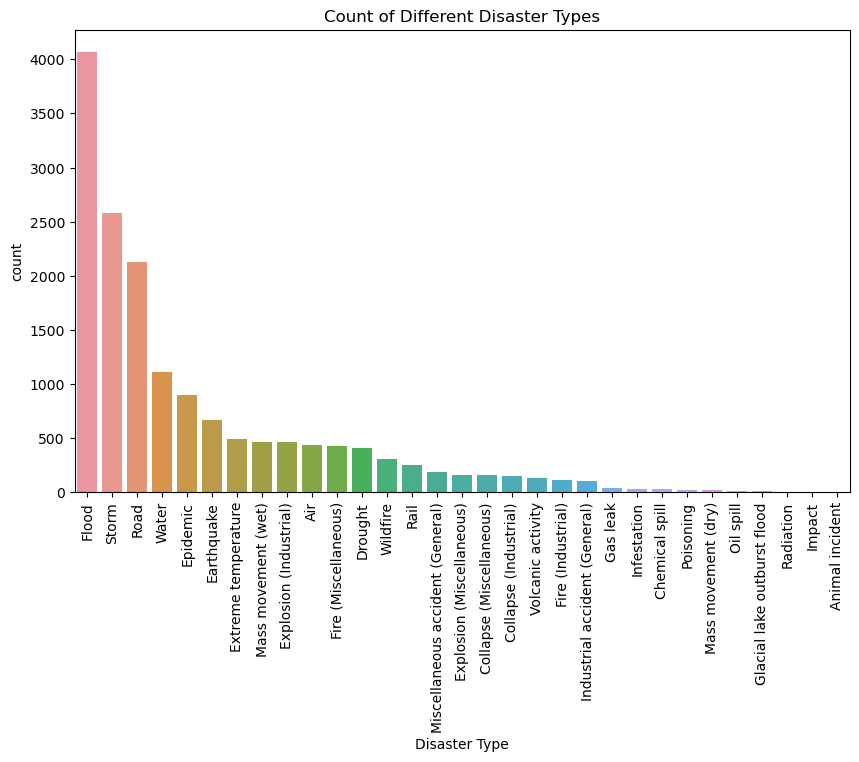

In [36]:
# Unique values in the 'Disaster Type' column
print("\nUnique Disaster Types:")
print(df['Disaster Type'].unique())

# Count plot for Disaster Types
# Set plot size
plt.figure(figsize = (10, 6))
# Configure the actual plot
sns.countplot(data = df, x = 'Disaster Type', order = df['Disaster Type'].value_counts().index)
# Set a title for the plot
plt.title('Count of Different Disaster Types')
# Rotate the x-axis values to display at a 90 degree angle
plt.xticks(rotation = 90)
# ALWAYS run this to show your plot 
plt.show()